In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def ReadImage(img_file):
    img_arr = mpimg.imread(img_file)
    plt.imshow(img_arr)
    return(img_arr)

(667, 1000, 3)
(667, 1000)


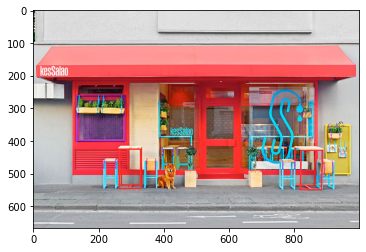

In [17]:
image_arr = ReadImage("./image.jpg")
print(image_arr.shape)
label_arr = np.zeros((image_arr.shape[0],image_arr.shape[1]))
print(label_arr.shape)

In [8]:
K = 7 

for i in range(label_arr.shape[0]):
    for j in range(label_arr.shape[1]):
        label_arr[i,j] = np.random.choice(K)
print(label_arr)
np.unique(label_arr)

[[0. 3. 4. ... 2. 2. 2.]
 [3. 6. 5. ... 4. 6. 0.]
 [6. 0. 5. ... 5. 0. 1.]
 ...
 [0. 4. 1. ... 1. 3. 5.]
 [2. 1. 0. ... 6. 5. 0.]
 [4. 6. 1. ... 6. 3. 0.]]


array([0., 1., 2., 3., 4., 5., 6.])

In [9]:
def dist_p(vec1,vec2,p):  
    L = len(vec1)
    s1 = 0
    for l in range(L):
        diff = np.abs(vec2[l]-vec1[l])
        s1 = s1 + diff**p
    distance = s1**(1/p)
    return(distance)

In [10]:
def init_mean(K,img_arr,label_arr):
    mean_ls = []
    pixel_ls = [[] for k in range(K)] 
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k:  
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:]))
                    
    for k in range(K): 
        pixel_mat = np.matrix(pixel_ls[k])
        mean_k = np.mean(pixel_mat,axis=0)
        mean_ls.append(np.ravel(mean_k))
    return(mean_ls)    

In [11]:
def label_update(prev_mean,img_arr,label_arr,p):
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            dist_ls = [] 
            for k in range(len(prev_mean)):
                dist = dist_p(img_arr[i,j,:],prev_mean[k],p) 
                dist_ls.append(dist) 
            dist_arr = np.array(dist_ls) 
            new_label = np.argmin(dist_arr) 
            label_arr[i,j] = new_label
    return(label_arr)

In [12]:
def mean_from_label(K,prev_mean,img_arr,label_arr):
    pixel_ls = [[] for k in range(K)]  
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k:
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:]))
                    
    for k in range(K):
        if len(pixel_ls[k]) != 0:  
            pixel_mat = np.matrix(pixel_ls[k])
            mean_k = np.mean(pixel_mat,axis=0)
            prev_mean[k] = np.ravel(mean_k)
    new_mean = prev_mean
    return(new_mean)    

In [13]:
def KMeans(img_arr,label_arr,K,p,maxIter):
    mean_old = init_mean(K,img_arr,label_arr)
    for t in range(maxIter):
        new_label_arr = label_update(mean_old,img_arr,label_arr,p)
        mean_new = mean_from_label(K,mean_old,img_arr,new_label_arr)
        print("The mean obtained at {}th iteration is {}\n".format(t,mean_new))
        label_arr = new_label_arr 
        mean_old = mean_new 
    return(mean_new,label_arr)

In [14]:
mean_final,label_final = KMeans(image_arr,label_arr,K,2,5)

The mean obtained at 0th iteration is [array([120.4372934 , 131.58953054, 139.5153628 ]), array([172.45069836,  68.31156514,  63.01043926]), array([173.99305556,  64.46006944, 210.91840278]), array([201.55403011, 193.21486111, 191.80421283]), array([184.56842724, 145.06796025, 143.34918303]), array([121.02868526, 152.06215139, 175.03625498]), array([187.85714286, 162.57142857, 128.64285714])]

The mean obtained at 1th iteration is [array([115.4069155 , 114.36333693, 119.53352256]), array([177.41136774,  56.58513901,  51.86298261]), array([159.93470375,  62.85299706, 192.91760235]), array([208.73504124, 205.86700949, 203.45228045]), array([207.97701782, 153.35512815, 155.5975055 ]), array([ 87.74128873, 180.60389629, 199.99687615]), array([219.66940618, 176.50943396, 111.5343211 ])]

The mean obtained at 2th iteration is [array([111.5422608 , 105.35753255, 105.98647448]), array([190.94964923,  53.57431245,  49.43927581]), array([156.39906103,  64.10475352, 186.48048709]), array([212.008

In [15]:
def segmentImage(image_arr,label_arr,mean_ls):
    seg_image = np.zeros((image_arr.shape[0],image_arr.shape[1],image_arr.shape[2]))
    for i in range(seg_image.shape[0]):
        for j in range(seg_image.shape[1]):
            k = label_arr[i,j]
            seg_image[i,j,:] = mean_ls[int(k)]
    seg_image = seg_image.astype(np.uint8)
    plt.imshow(seg_image)

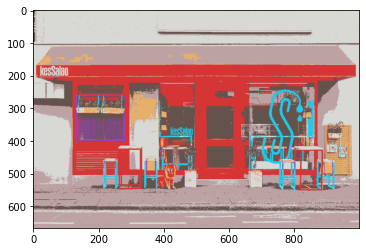

In [16]:
segmentImage(image_arr,label_final,mean_final)